In [16]:
## Part 1: NumPy Fundamentals

import numpy as np


In [17]:
# 1D Array
a = np.array([1, 2, 3])

# 2D Array
b = np.array([[1, 2, 3],
              [4, 5, 6]])

# 3D-like Matrix
c = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print(a)
print(b)
print(c)


[1 2 3]
[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [18]:
print("Array a:", a.ndim, a.shape, a.size, a.dtype)
print("Array b:", b.ndim, b.shape, b.size, b.dtype)
print("Array c:", c.ndim, c.shape, c.size, c.dtype)


Array a: 1 (3,) 3 int64
Array b: 2 (2, 3) 6 int64
Array c: 2 (3, 3) 9 int64


In [19]:
# Zero matrix
d = np.zeros((2, 4))

# Ones matrix
e = np.ones((2, 3))

print(d)
print(e)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [20]:
a1 = np.arange(8)
print(a1)

a2 = np.arange(0, 8, 2)
print(a2)


[0 1 2 3 4 5 6 7]
[0 2 4 6]


In [21]:
b1 = np.eye(2, 4)
print(b1)


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [22]:
print("Mean:", np.mean(a1))
print("Median:", np.median(a1))
print("Standard Deviation:", np.std(a1))


Mean: 3.5
Median: 3.5
Standard Deviation: 2.29128784747792


In [23]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print("Addition:", x + y)
print("Multiplication:", x * y)


Addition: [5 7 9]
Multiplication: [ 4 10 18]


In [24]:
print(a2[0])      # indexing
print(a2[1:3])    # slicing


0
[2 4]


In [25]:
filtered = a1[a1 > 3]
print(filtered)


[4 5 6 7]


In [27]:
## Part 2: Pandas 
#A
#Data loading and cleaning

In [28]:
import pandas as pd

df = pd.read_csv("titanic.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
# Fill missing Age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Drop Cabin column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Drop remaining missing values
df.dropna(inplace=True)


In [31]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')


In [32]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [33]:
#B
#Data manipulation


# Filter passengers older than 30
df[df['Age'] > 30].head()

# Select specific columns
df[['Name', 'Age', 'Sex', 'Survived']].head()

# Using loc
df.loc[0:5, ['Name', 'Fare']]

# Using iloc
df.iloc[0:5, 0:5]



,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


In [35]:
df.groupby('Sex').agg({
    'Age': 'mean',
    'Fare': 'sum',
    'Survived': 'count'
})


,Age,Fare,Survived
Sex,,,
female,28.077094,13806.6628,312
male,30.505824,14727.2865,577


In [36]:
#matplotlib
import matplotlib.pyplot as plt

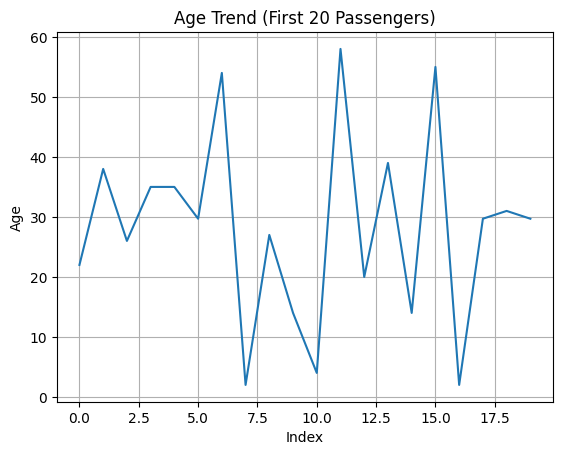

In [37]:
#Line plot

plt.plot(df['Age'].head(20))
plt.title("Age Trend (First 20 Passengers)")
plt.xlabel("Index")
plt.ylabel("Age")
plt.grid()
plt.show()


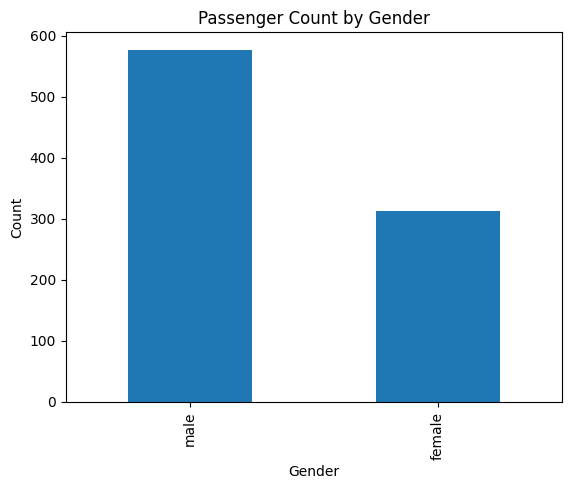

In [38]:
#Bar chart
df['Sex'].value_counts().plot(kind='bar')
plt.title("Passenger Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


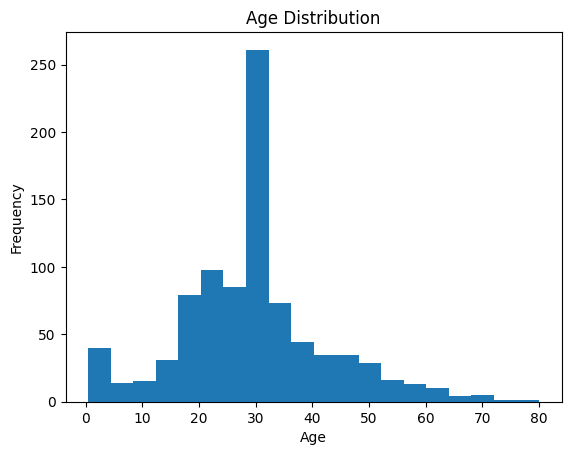

In [39]:
#histogram
plt.hist(df['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


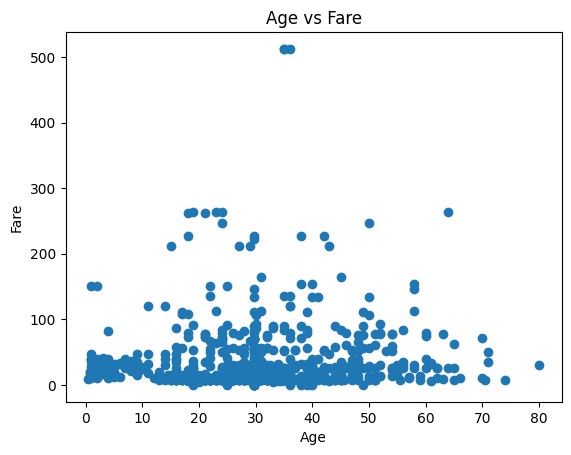

In [40]:
#scatter plot
plt.scatter(df['Age'], df['Fare'])
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


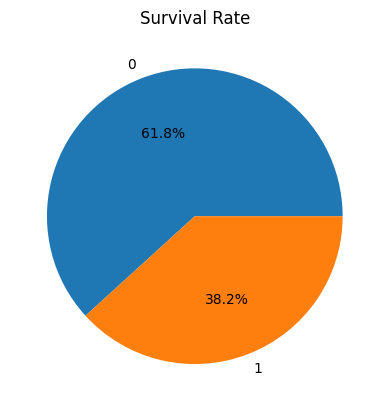

In [41]:
#Box plot
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Survival Rate")
plt.ylabel("")
plt.show()


In [42]:
#Seaborn 
import seaborn as sns


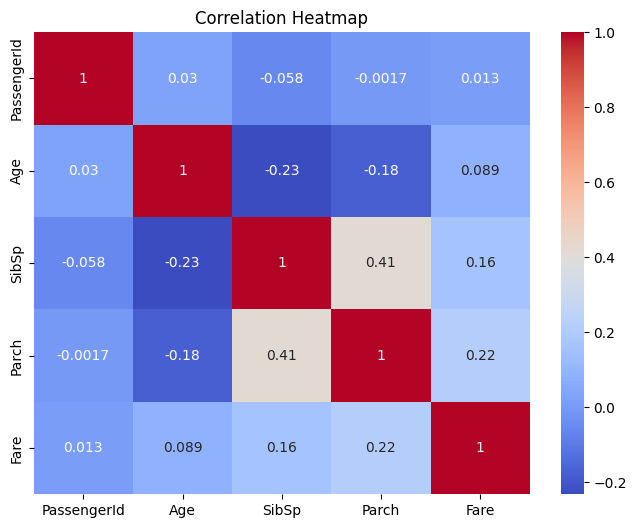

In [43]:
#Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


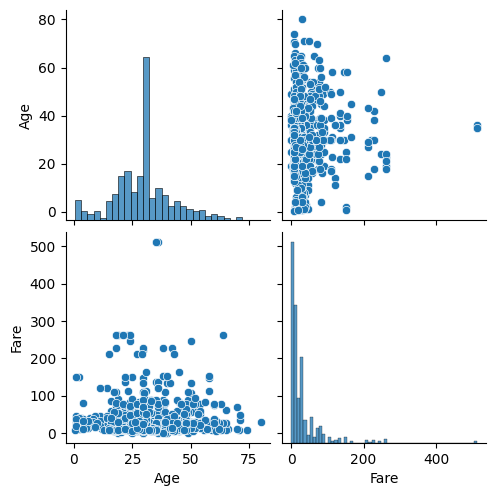

In [44]:
#Pairplot
sns.pairplot(df[['Age', 'Fare', 'Survived']])
plt.show()


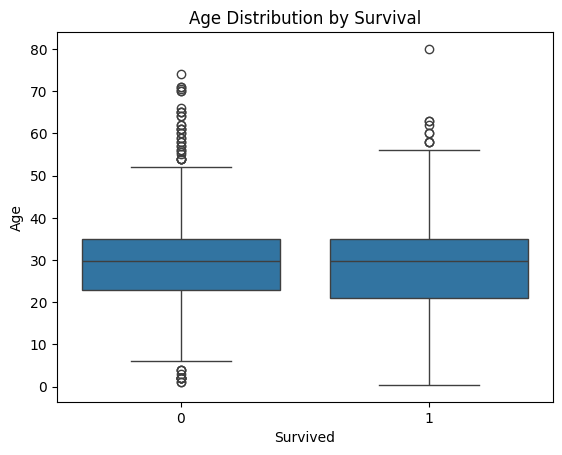

In [45]:
#Boxplot
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()
